# EDA, Data cleaning, visualization and House price Prediction
## You will see prediction and performance with almost all models using **LazyPredict**

In [1]:
# Importing the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.pandas.set_option('display.max_columns',None)
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
import sklearn.metrics as metrics
import math
import sklearn

In [2]:
train_df=pd.read_csv('/home/dheeraj/my_projects/my_project_env/practice/EDA_and_prediction/EDA_FE_FS_House_Price_Prediction/train.csv')   # importing the training data file
print(train_df.shape)

(1460, 81)


In [3]:
train_df.head()          # Print the top 5 values of the dataset 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test_df=pd.read_csv('/home/dheeraj/my_projects/my_project_env/practice/EDA_and_prediction/EDA_FE_FS_House_Price_Prediction/test.csv')      # importing the test data file
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## 1. Let's do some EDA on training dataset

## Check for Nan values

In [5]:
column_with_na = [features for features in train_df.columns if train_df[features].isnull().sum() >1]
print("Total number of features having some nan values is: ", len(column_with_na))
column_with_na

Total number of features having some nan values is:  18


['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

## Get the percentage of Nan values in the columns we got in above shell

In [6]:
for features in column_with_na:
    print("Column", features, "have", np.round(train_df[features].isnull().mean(), 4)*100, "% NaN value")

Column LotFrontage have 17.740000000000002 % NaN value
Column Alley have 93.77 % NaN value
Column MasVnrType have 0.5499999999999999 % NaN value
Column MasVnrArea have 0.5499999999999999 % NaN value
Column BsmtQual have 2.53 % NaN value
Column BsmtCond have 2.53 % NaN value
Column BsmtExposure have 2.6 % NaN value
Column BsmtFinType1 have 2.53 % NaN value
Column BsmtFinType2 have 2.6 % NaN value
Column FireplaceQu have 47.260000000000005 % NaN value
Column GarageType have 5.55 % NaN value
Column GarageYrBlt have 5.55 % NaN value
Column GarageFinish have 5.55 % NaN value
Column GarageQual have 5.55 % NaN value
Column GarageCond have 5.55 % NaN value
Column PoolQC have 99.52 % NaN value
Column Fence have 80.75 % NaN value
Column MiscFeature have 96.3 % NaN value


## Let's find the reationship b/w columns with nan values and 'Sale price' column

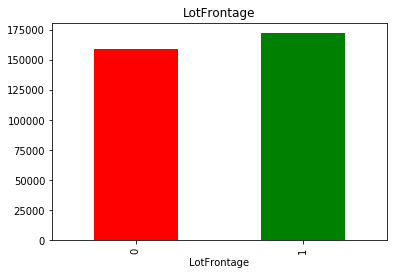

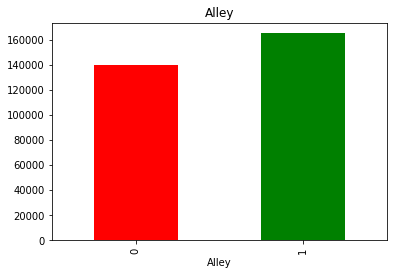

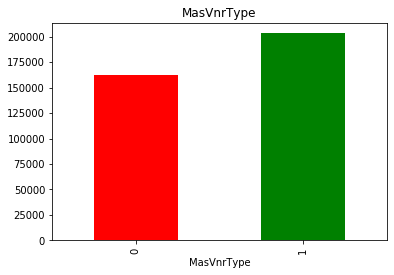

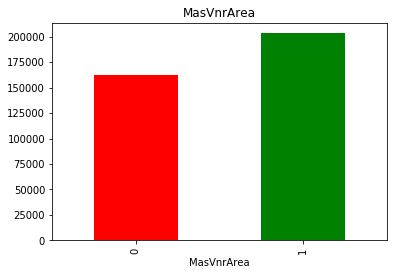

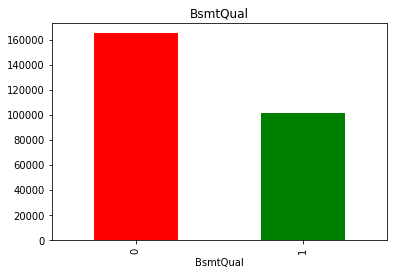

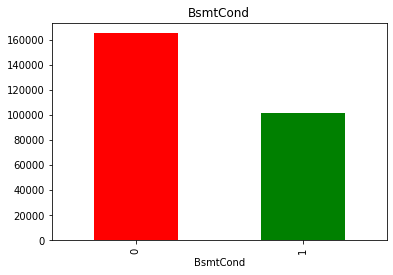

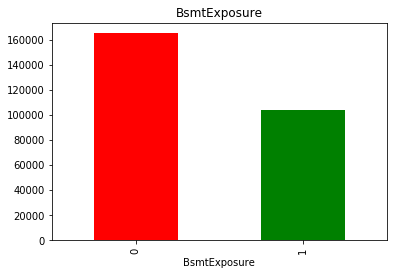

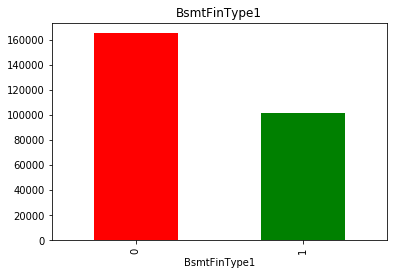

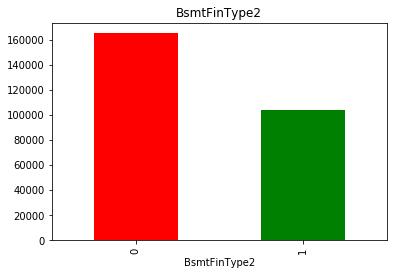

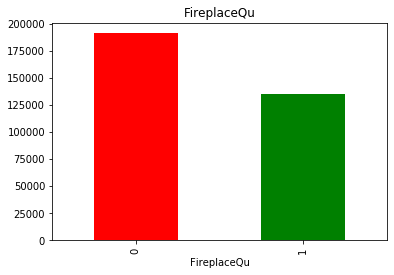

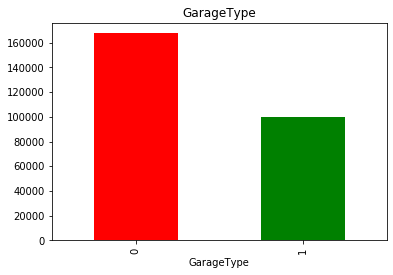

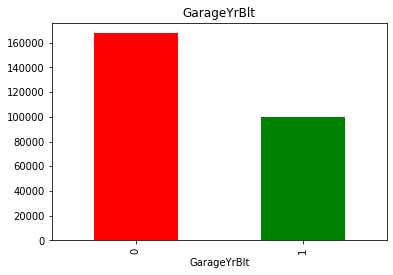

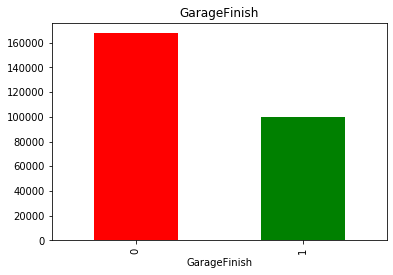

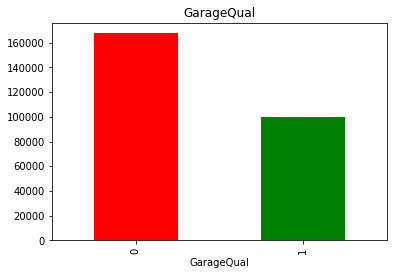

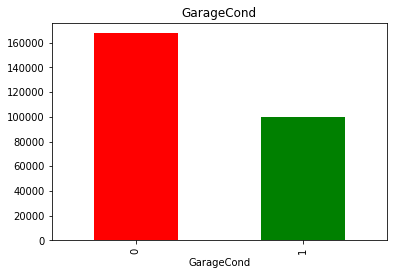

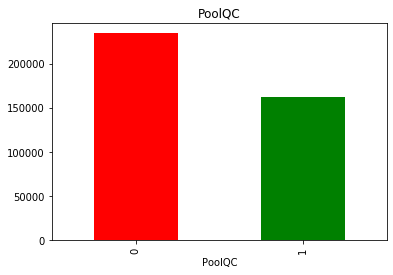

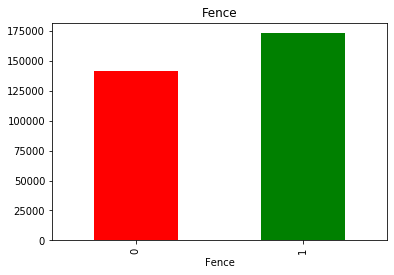

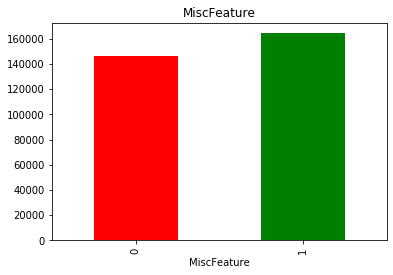

In [7]:
for features in column_with_na:
    data = train_df.copy() 
    data[features] = np.where(data[features].isnull(), 1, 0)
    col = ["red", "green"]
    data.groupby(features)['SalePrice'].median().plot.bar(color = col)
    plt.title(features)
    plt.show()
    
## we can see in the output of this shell that, there's no such specific patterns we're getting. 

## Find the columns with Numerical feature

In [8]:
column_with_numerical_values = [features for features in train_df.columns if train_df[features].dtypes != 'O']
print("Total number of features with numerical values is: ", len(column_with_numerical_values))
# column_with_numerical_values
train_df[column_with_numerical_values].head()

Total number of features with numerical values is:  38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


## Number of unique values in Columns with numerical Feature 

In [9]:
for feature in column_with_numerical_values:
    data = train_df.copy()
    print(feature, len(data[feature].unique()))

Id 1460
MSSubClass 15
LotFrontage 111
LotArea 1073
OverallQual 10
OverallCond 9
YearBuilt 112
YearRemodAdd 61
MasVnrArea 328
BsmtFinSF1 637
BsmtFinSF2 144
BsmtUnfSF 780
TotalBsmtSF 721
1stFlrSF 753
2ndFlrSF 417
LowQualFinSF 24
GrLivArea 861
BsmtFullBath 4
BsmtHalfBath 3
FullBath 4
HalfBath 3
BedroomAbvGr 8
KitchenAbvGr 4
TotRmsAbvGrd 12
Fireplaces 4
GarageYrBlt 98
GarageCars 5
GarageArea 441
WoodDeckSF 274
OpenPorchSF 202
EnclosedPorch 120
3SsnPorch 20
ScreenPorch 76
PoolArea 8
MiscVal 21
MoSold 12
YrSold 5
SalePrice 663


## Columns with discrete values

In [10]:
column_discrete_values = [feature for feature in column_with_numerical_values if len(train_df[feature].unique()) <25]
print("Total number of numerical features with discrete values is: ", len(column_discrete_values))
data[column_discrete_values].head()


Total number of numerical features with discrete values is:  18


,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2,2008
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5,2007
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9,2008
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2,2006
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12,2008


## Relationship between columns(we got from above shell) having discrete values with 'SalePrice'

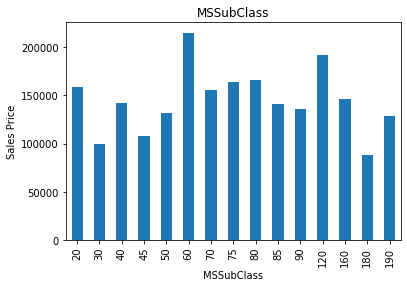

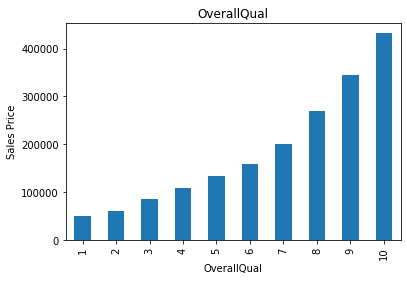

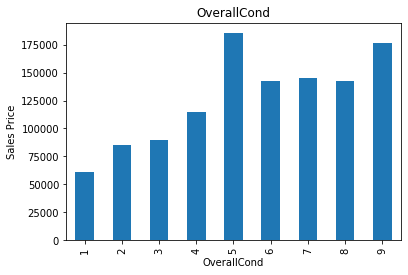

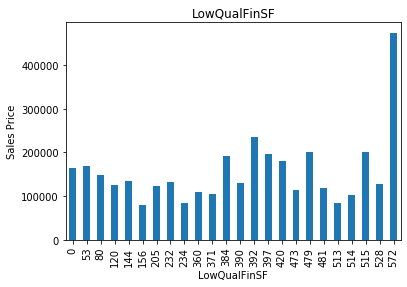

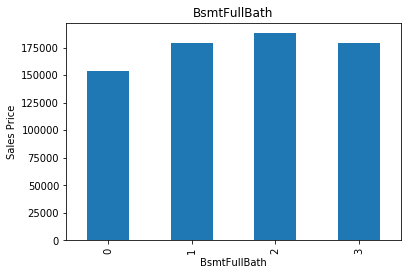

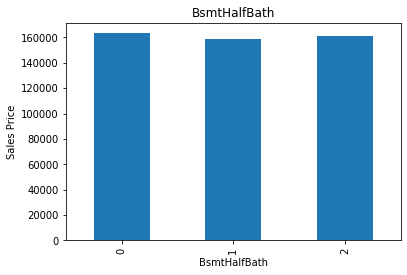

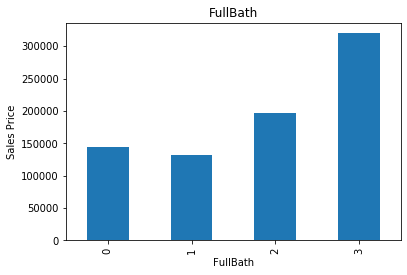

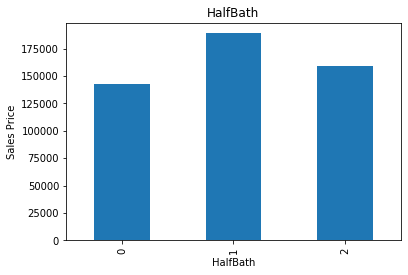

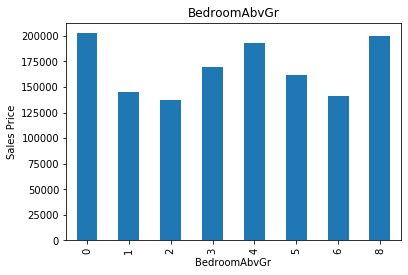

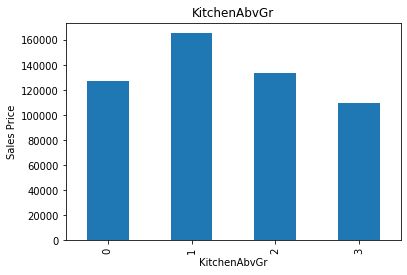

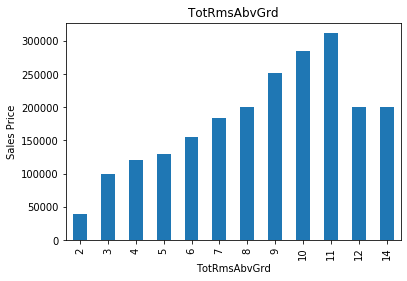

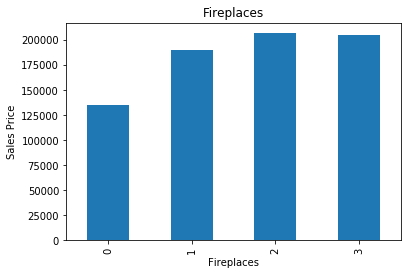

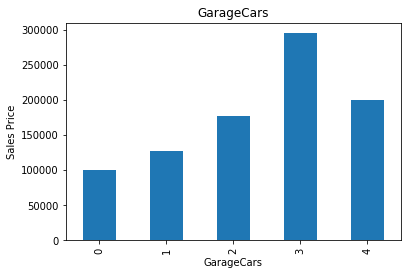

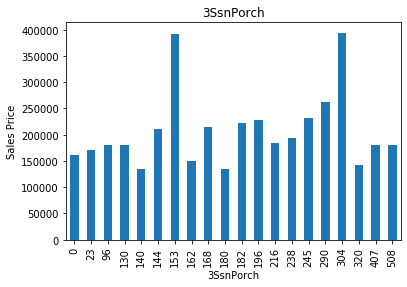

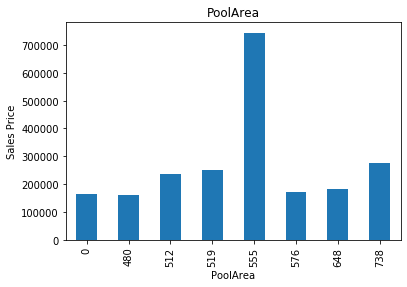

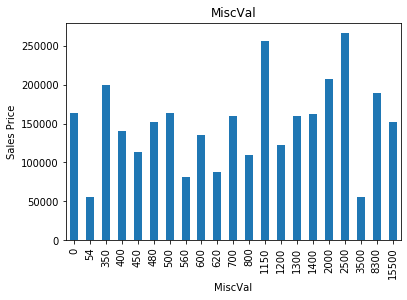

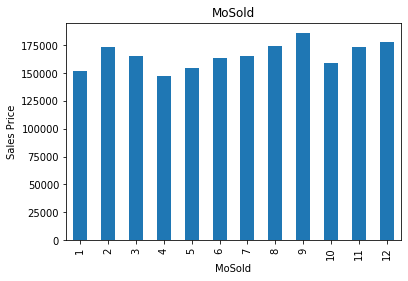

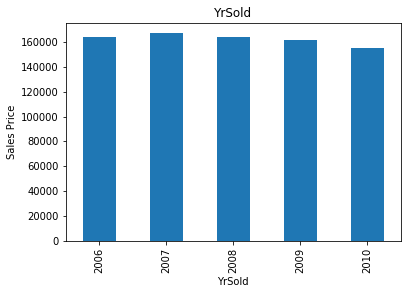

In [11]:
for feature in column_discrete_values:
    data = train_df.copy()    
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel("Sales Price")
    plt.show()

## Columns with continuous values

In [12]:
column_continuous_values = [feature for feature in column_with_numerical_values if len(train_df[feature].unique()) >=25]
print("Total number of numerical features with discrete values is: ", len(column_continuous_values))
data[column_continuous_values].head()


Total number of numerical features with discrete values is:  20


,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,1,65.0,8450,2003,2003,196.0,706,0,150,856,856,854,1710,2003.0,548,0,61,0,0,208500
1,2,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,0,1262,1976.0,460,298,0,0,0,181500
2,3,68.0,11250,2001,2002,162.0,486,0,434,920,920,866,1786,2001.0,608,0,42,0,0,223500
3,4,60.0,9550,1915,1970,0.0,216,0,540,756,961,756,1717,1998.0,642,0,35,272,0,140000
4,5,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,1053,2198,2000.0,836,192,84,0,0,250000


## Relationship b/w columns with continuous values with 'SalePrice' (by plotting Histograms)

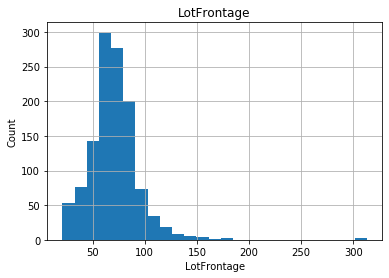

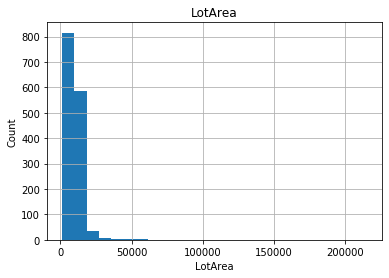

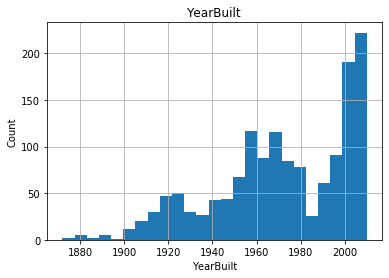

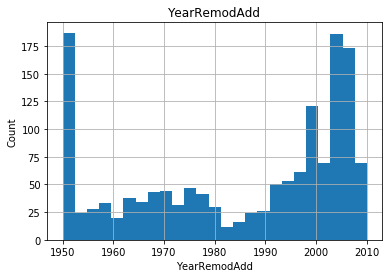

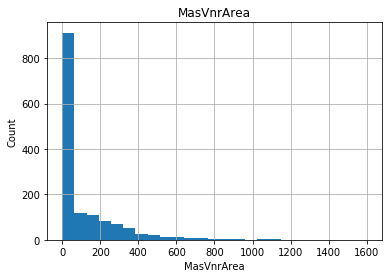

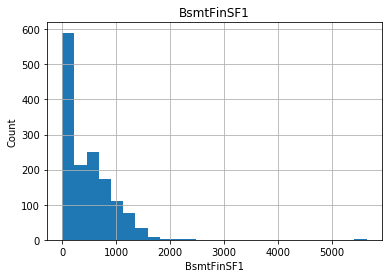

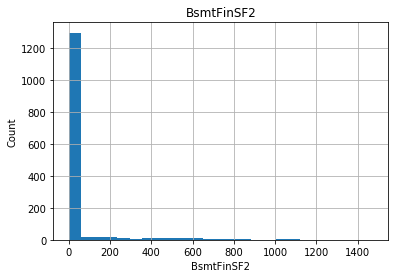

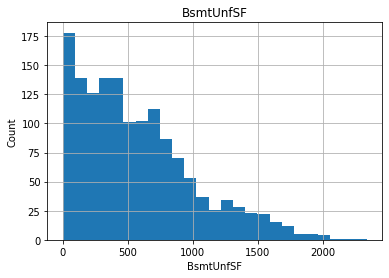

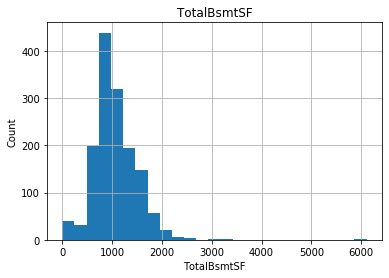

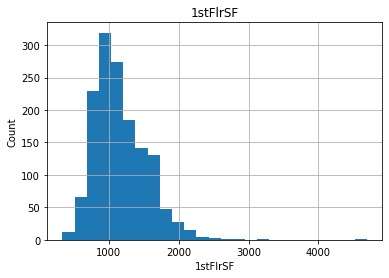

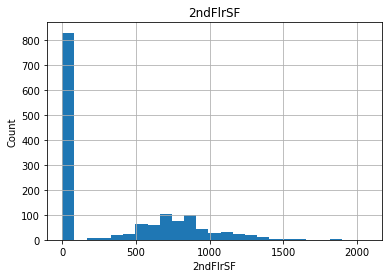

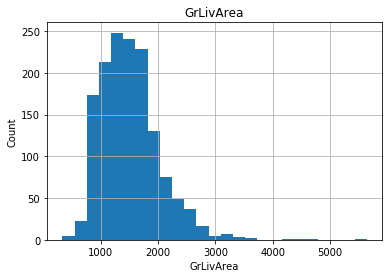

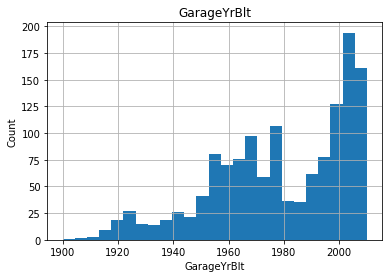

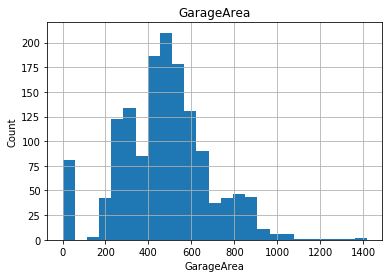

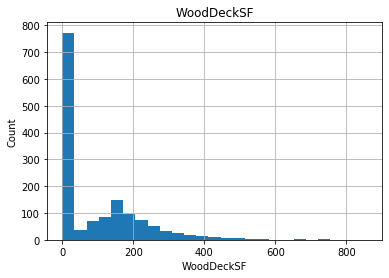

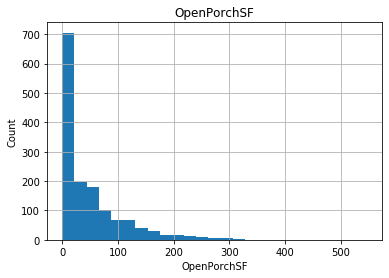

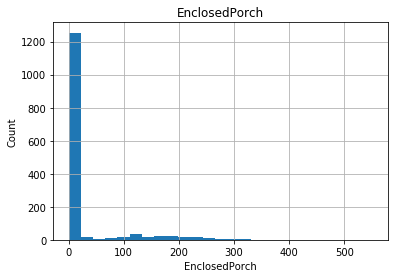

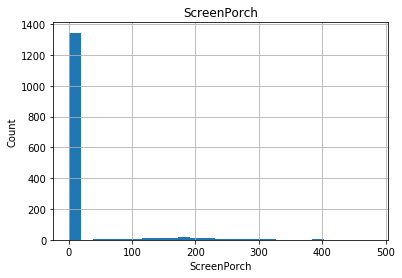

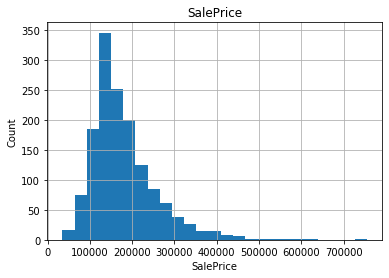

In [13]:
for feature in column_continuous_values:
    if feature != 'Id':  
        data[feature].hist(bins=25)
        plt.title(feature)
        plt.xlabel(feature)
        plt.ylabel("Count")
        plt.show()

## Since we didn't get any good insights from above relationship plots, so we'll make scatter plot by taking log of 'SalePrice' column

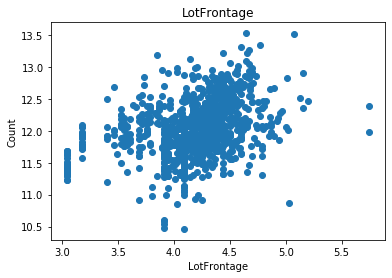

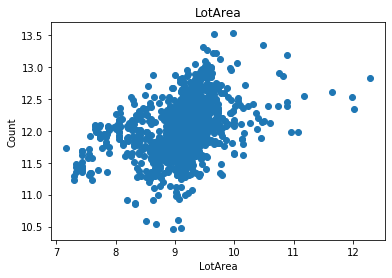

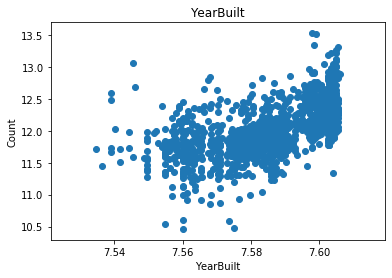

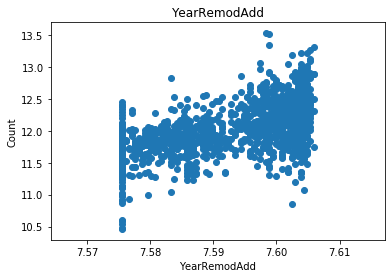

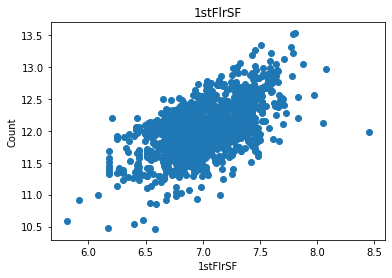

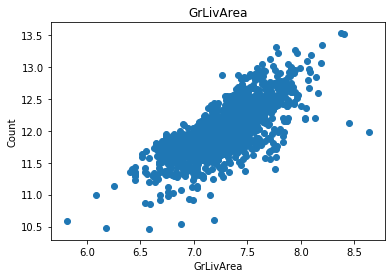

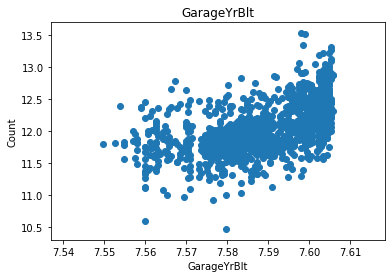

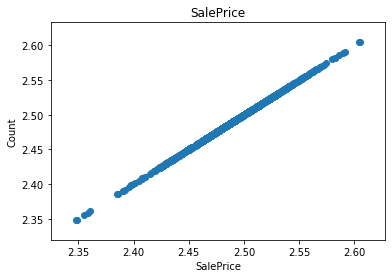

In [14]:
for feature in column_continuous_values:
    if feature != 'Id':  
        data = train_df.copy()
        if 0 in data[feature].unique():
            pass
        else:
            data[feature] = np.log(data[feature])
            data['SalePrice'] = np.log(data['SalePrice'])
            plt.scatter(data[feature], data['SalePrice'])
            plt.title(feature)
            plt.xlabel(feature)
            plt.ylabel("Count") 
            plt.show()
## We can see in the output of this shell that most of the plots showing linear corelation

## Now we'll check for some outliers in the features having continuous values

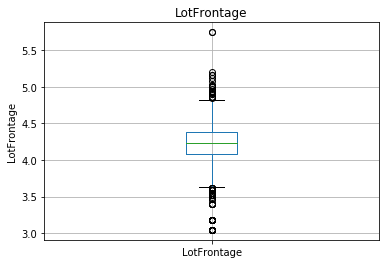

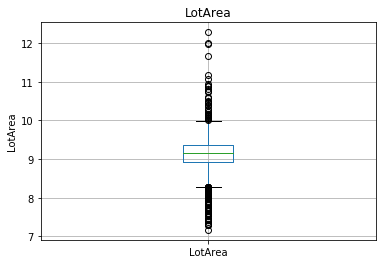

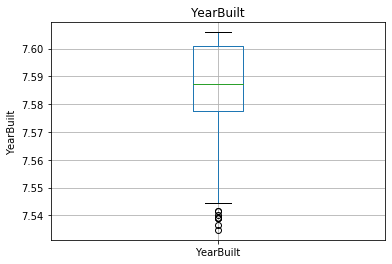

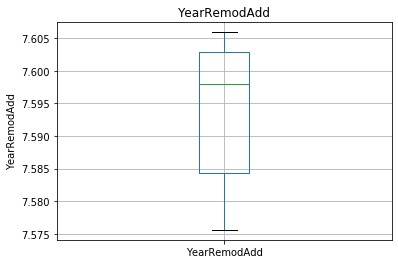

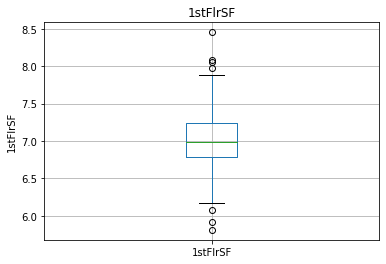

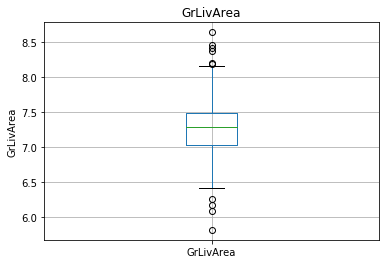

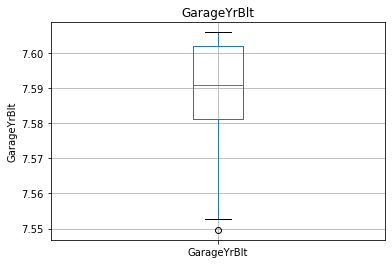

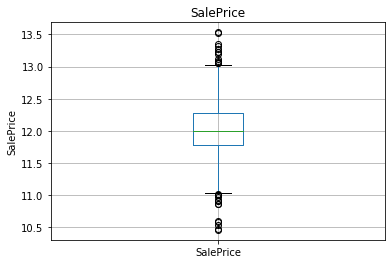

In [15]:
for feature in column_continuous_values:
    if feature != 'Id':  
        data = train_df.copy()
        if 0 in data[feature].unique():
            pass
        else:
            data[feature] = np.log(data[feature])
#             data['SalePrice'] = np.log(data['SalePrice'])
            data.boxplot(column = feature)
            plt.title(feature)
#             plt.xlabel(feature)
            plt.ylabel(feature) 
            plt.show()

## ## Number of unique values in Columns with Categorical Variable

In [16]:
column_with_categorical_values = [features for features in train_df.columns if train_df[features].dtypes == 'O']


print("Total number of features with numerical values is: ", len(column_with_categorical_values))
# column_with_categorical_values
train_df[column_with_categorical_values].head()

Total number of features with numerical values is:  43


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [17]:
for feature in column_with_categorical_values:
    data = train_df.copy()
    print(feature, len(data[feature].unique()))

MSZoning 5
Street 2
Alley 3
LotShape 4
LandContour 4
Utilities 2
LotConfig 5
LandSlope 3
Neighborhood 25
Condition1 9
Condition2 8
BldgType 5
HouseStyle 8
RoofStyle 6
RoofMatl 8
Exterior1st 15
Exterior2nd 16
MasVnrType 5
ExterQual 4
ExterCond 5
Foundation 6
BsmtQual 5
BsmtCond 5
BsmtExposure 5
BsmtFinType1 7
BsmtFinType2 7
Heating 6
HeatingQC 5
CentralAir 2
Electrical 6
KitchenQual 4
Functional 7
FireplaceQu 6
GarageType 7
GarageFinish 4
GarageQual 6
GarageCond 6
PavedDrive 3
PoolQC 4
Fence 5
MiscFeature 5
SaleType 9
SaleCondition 6


## Visualize the columns with categorical data with 'SalePrice

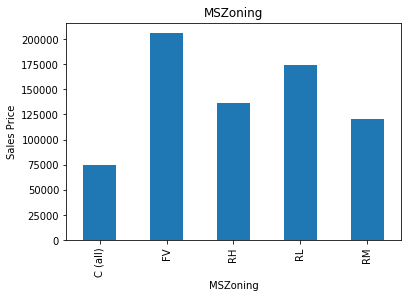

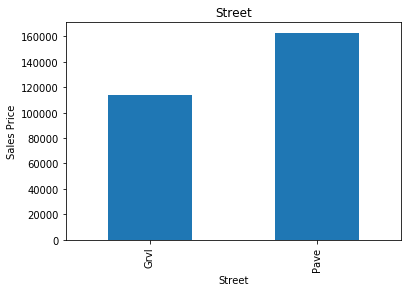

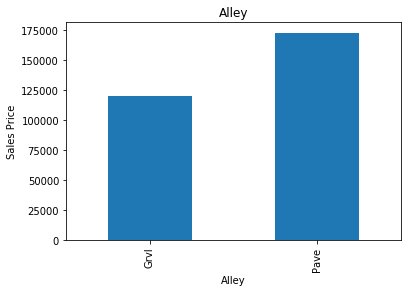

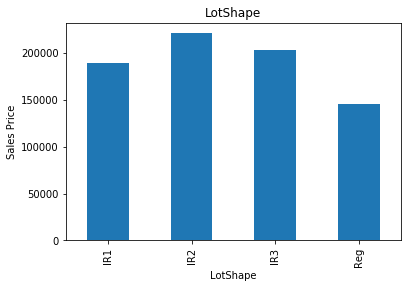

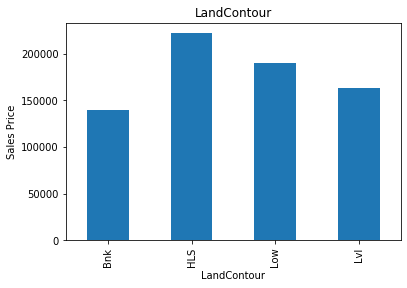

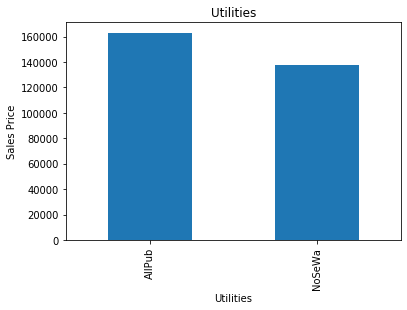

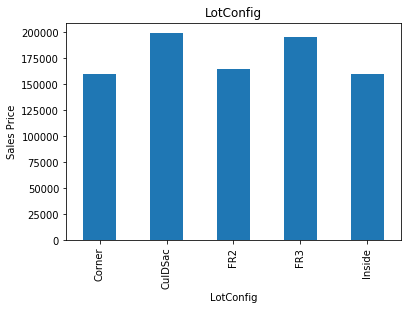

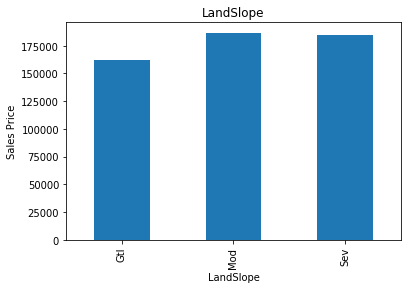

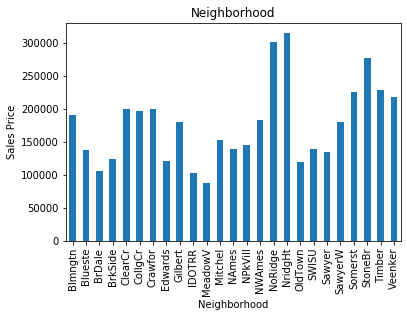

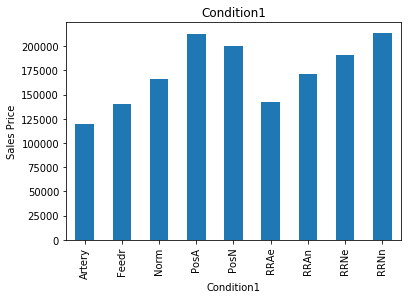

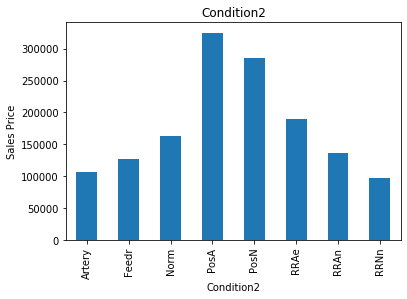

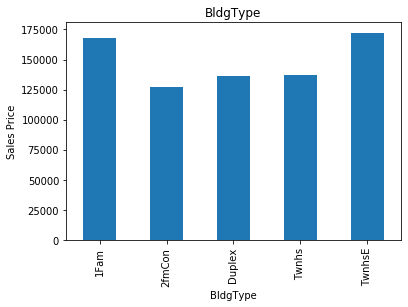

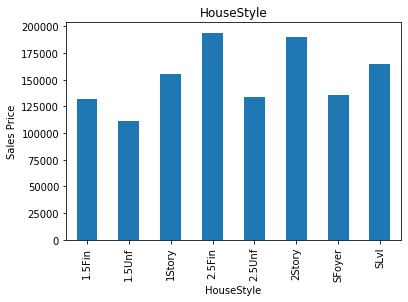

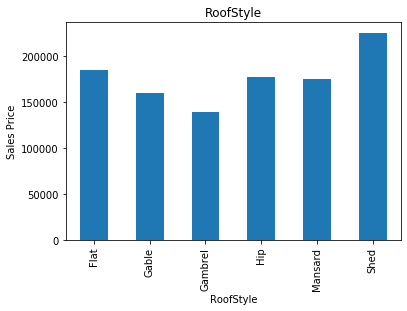

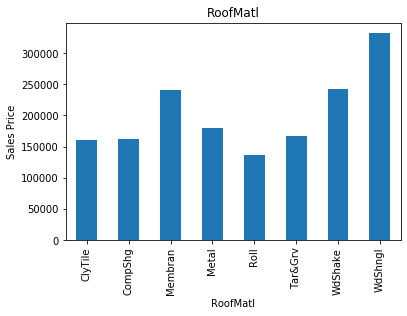

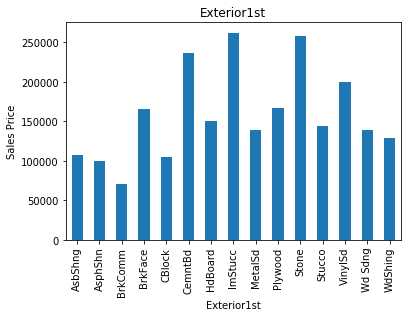

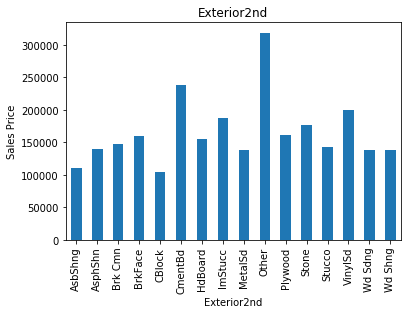

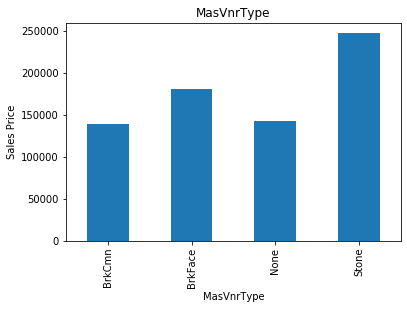

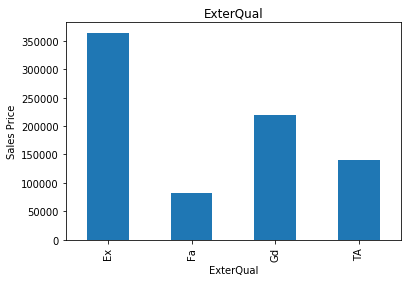

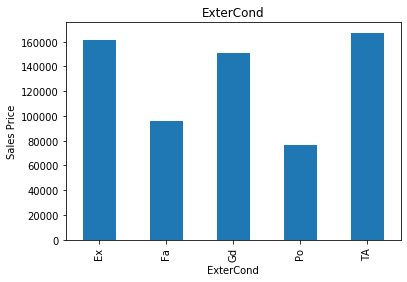

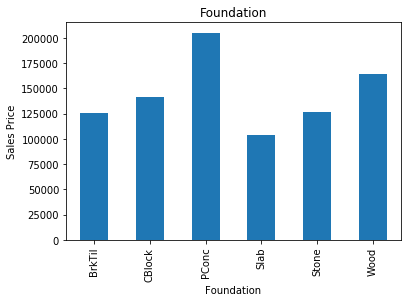

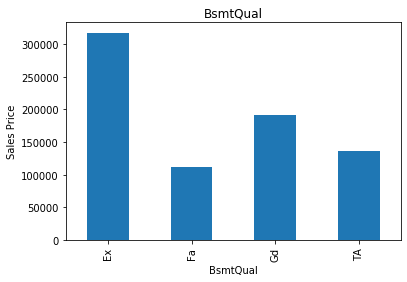

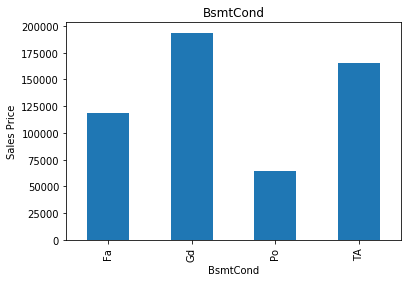

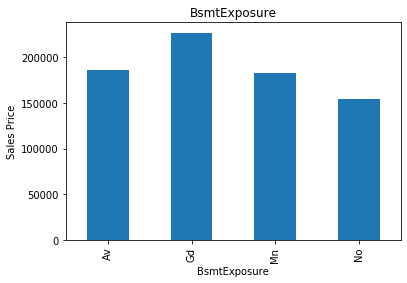

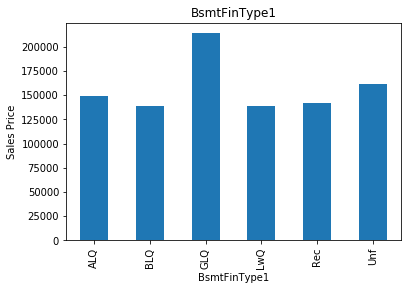

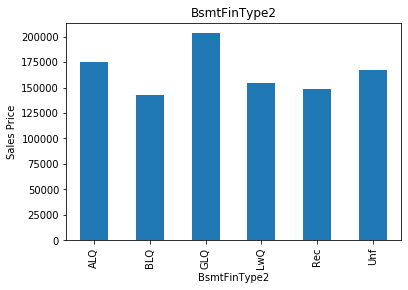

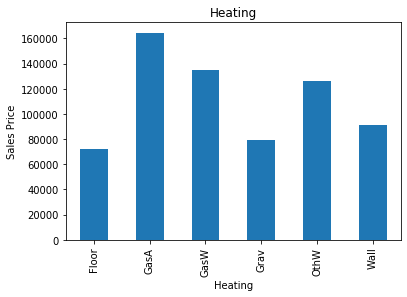

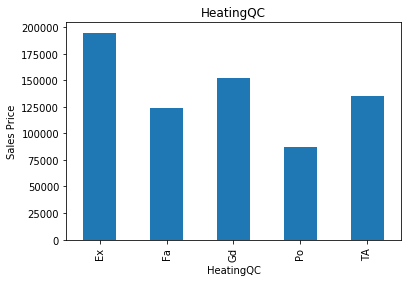

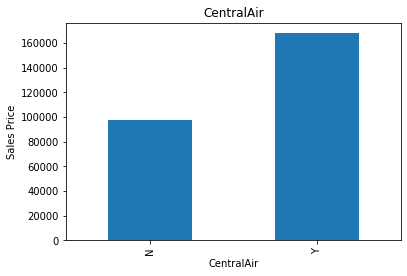

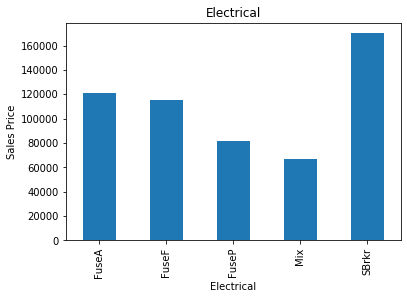

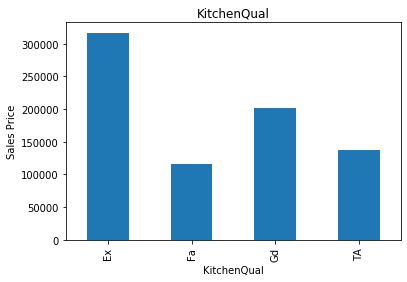

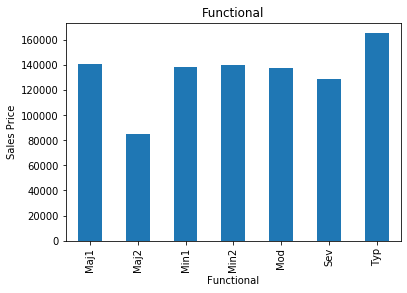

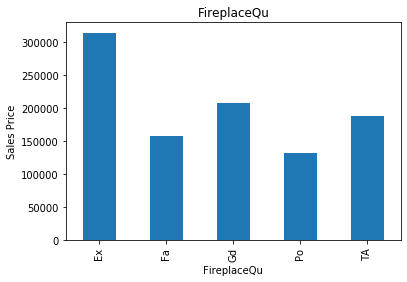

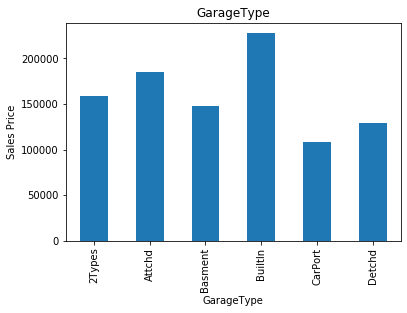

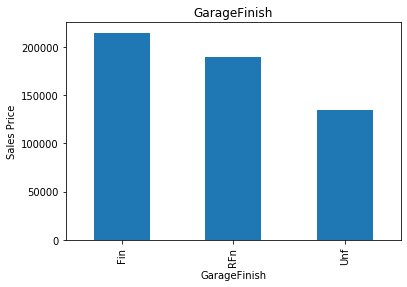

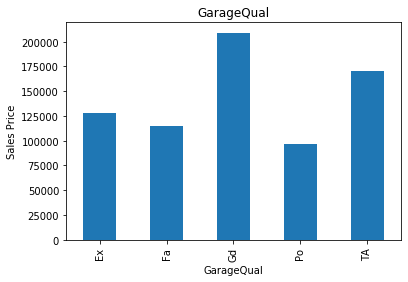

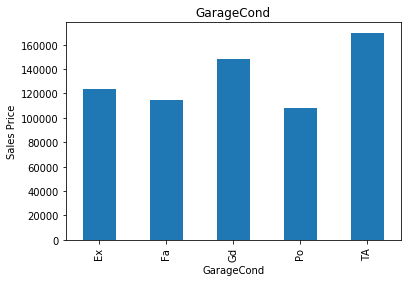

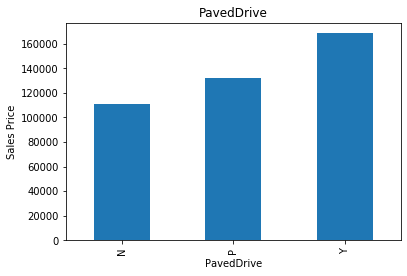

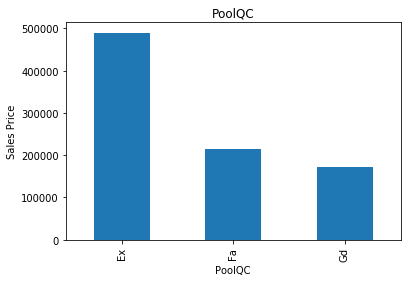

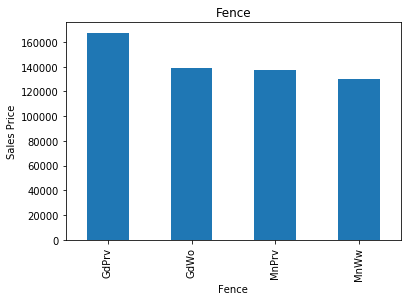

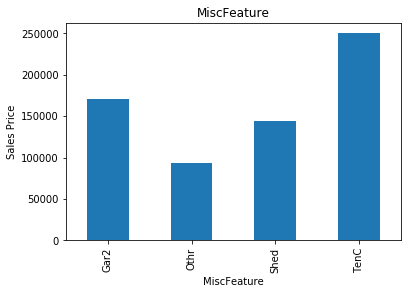

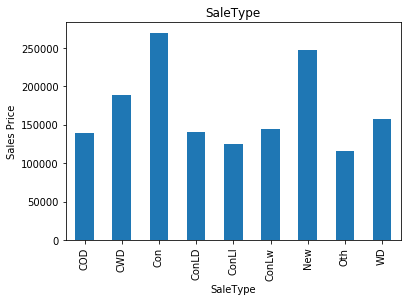

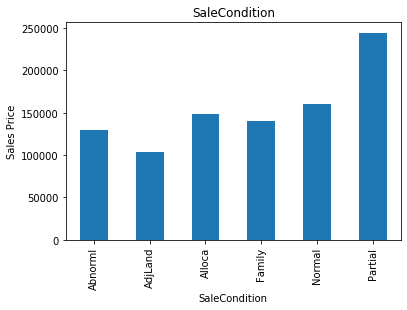

In [18]:
for feature in column_with_categorical_values:
    data = train_df.copy()    
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel("Sales Price")
    plt.show()

In [19]:
column_with_year = [feature for feature in column_with_numerical_values if 'Yr' in feature or 'Year' in feature]
print("Total number of features with date entries is: ", len(column_with_year))
train_df[column_with_year]

Total number of features with date entries is:  4


,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008
...,...,...,...,...
1455,1999,2000,1999.0,2007
1456,1978,1988,1978.0,2010
1457,1941,2006,1941.0,2010
1458,1950,1996,1950.0,2010


## Realationship b/w 'YrSold' column with 'SalePrice' (taking groupby wrt. saleprice)

Text(0.5, 0, 'Year Sold')

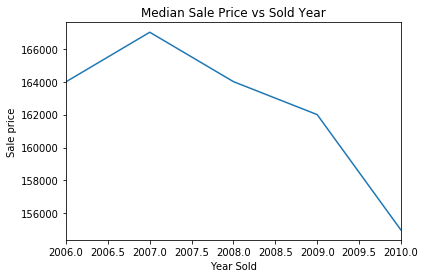

In [20]:
train_df.groupby('YrSold')['SalePrice'].median().plot()
plt.title('Median Sale Price vs Sold Year')
plt.ylabel('Sale price')
plt.xlabel('Year Sold')

## Relationship b/w different year column (subtracted with sold year) with 'SalePrice'

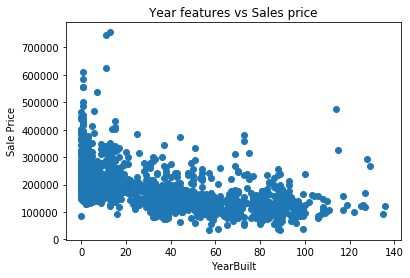

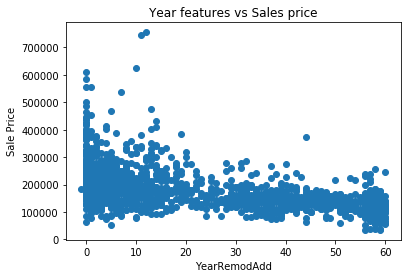

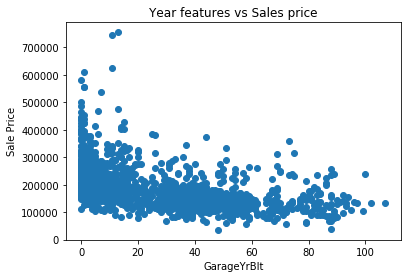

In [21]:
for feature in column_with_year:
    if feature != 'YrSold':
        data = train_df.copy()
        data[feature] = data['YrSold'] - data[feature]
        plt.scatter(data[feature], data['SalePrice'])
        plt.title("Year features vs Sales price")
        plt.xlabel(feature)
        plt.ylabel("Sale Price")
        plt.show()
# We can see if the year gap is more the price is less

## 2. Feature engineering

### We will do feature engineering after combining both test and training dataset, to avoid repetition 

In [22]:
test_df['SalePrice'] = 0
print("The shape of given test data is: ", test_df.shape)

The shape of given test data is:  (1459, 81)


In [23]:
## we'll concatenate both table
full_df_feature_eng = pd.concat([train_df, test_df], axis=0,sort=False)
print("The shape of dataset after combining both test and train dataset is: ",full_df_feature_eng.shape)

The shape of dataset after combining both test and train dataset is:  (2919, 81)


In [24]:
full_df_feature_eng.tail()   # Print the tail end of the combined datsset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,0
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,0
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,0
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,0
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal,0


## Categorical columns with some NaN values

In [25]:
columns_nan_in_categorical =[features for features in full_df_feature_eng.columns if full_df_feature_eng[features].isnull().sum()>1 and full_df_feature_eng[features].dtypes=='O']
print("Total number of categorical features having some nan values is: ", len(columns_nan_in_categorical), "\n")
for features in columns_nan_in_categorical:
    print("Column", features, "have", np.round(full_df_feature_eng[features].isnull().mean(), 4)*100, "% NaN value")


Total number of categorical features having some nan values is:  18 

Column MSZoning have 0.13999999999999999 % NaN value
Column Alley have 93.22 % NaN value
Column Utilities have 0.06999999999999999 % NaN value
Column MasVnrType have 0.8200000000000001 % NaN value
Column BsmtQual have 2.77 % NaN value
Column BsmtCond have 2.81 % NaN value
Column BsmtExposure have 2.81 % NaN value
Column BsmtFinType1 have 2.71 % NaN value
Column BsmtFinType2 have 2.74 % NaN value
Column Functional have 0.06999999999999999 % NaN value
Column FireplaceQu have 48.65 % NaN value
Column GarageType have 5.38 % NaN value
Column GarageFinish have 5.45 % NaN value
Column GarageQual have 5.45 % NaN value
Column GarageCond have 5.45 % NaN value
Column PoolQC have 99.66000000000001 % NaN value
Column Fence have 80.44 % NaN value
Column MiscFeature have 96.39999999999999 % NaN value


In [26]:
full_df_feature_eng[columns_nan_in_categorical].head()  # Printing all the categorical columns with Nan values

,MSZoning,Alley,Utilities,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,RL,NaN,AllPub,BrkFace,Gd,TA,No,GLQ,Unf,Typ,NaN,Attchd,RFn,TA,TA,NaN,NaN,NaN
1,RL,NaN,AllPub,None,Gd,TA,Gd,ALQ,Unf,Typ,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN
2,RL,NaN,AllPub,BrkFace,Gd,TA,Mn,GLQ,Unf,Typ,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN
3,RL,NaN,AllPub,None,TA,Gd,No,ALQ,Unf,Typ,Gd,Detchd,Unf,TA,TA,NaN,NaN,NaN
4,RL,NaN,AllPub,BrkFace,Gd,TA,Av,GLQ,Unf,Typ,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN


## Fill the all the Nan with 'Missing'

In [27]:
for features in columns_nan_in_categorical:
    full_df_feature_eng[features] = full_df_feature_eng[features].fillna('Missing')

full_df_feature_eng[columns_nan_in_categorical].head()

,MSZoning,Alley,Utilities,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,RL,Missing,AllPub,BrkFace,Gd,TA,No,GLQ,Unf,Typ,Missing,Attchd,RFn,TA,TA,Missing,Missing,Missing
1,RL,Missing,AllPub,None,Gd,TA,Gd,ALQ,Unf,Typ,TA,Attchd,RFn,TA,TA,Missing,Missing,Missing
2,RL,Missing,AllPub,BrkFace,Gd,TA,Mn,GLQ,Unf,Typ,TA,Attchd,RFn,TA,TA,Missing,Missing,Missing
3,RL,Missing,AllPub,None,TA,Gd,No,ALQ,Unf,Typ,Gd,Detchd,Unf,TA,TA,Missing,Missing,Missing
4,RL,Missing,AllPub,BrkFace,Gd,TA,Av,GLQ,Unf,Typ,TA,Attchd,RFn,TA,TA,Missing,Missing,Missing


## Numerical columns with some NaN values

In [28]:
columns_nan_in_numerical =[features for features in full_df_feature_eng.columns if full_df_feature_eng[features].isnull().sum()>1 and full_df_feature_eng[features].dtypes!='O']
print("Total number of numerical features having some nan values is: ", len(columns_nan_in_numerical), "\n")

for features in columns_nan_in_numerical:
    print("Column", features, "have", np.round(full_df_feature_eng[features].isnull().mean(), 4)*100, "% NaN value")

Total number of numerical features having some nan values is:  5 

Column LotFrontage have 16.650000000000002 % NaN value
Column MasVnrArea have 0.79 % NaN value
Column BsmtFullBath have 0.06999999999999999 % NaN value
Column BsmtHalfBath have 0.06999999999999999 % NaN value
Column GarageYrBlt have 5.45 % NaN value


In [29]:
full_df_feature_eng[columns_nan_in_numerical].head()   # Printing all the numerical columns with Nan values

,LotFrontage,MasVnrArea,BsmtFullBath,BsmtHalfBath,GarageYrBlt
0,65.0,196.0,1.0,0.0,2003.0
1,80.0,0.0,0.0,1.0,1976.0
2,68.0,162.0,1.0,0.0,2001.0
3,60.0,0.0,1.0,0.0,1998.0
4,84.0,350.0,1.0,0.0,2000.0


## Replace all the Nan values of numerical

In [30]:
for features in columns_nan_in_numerical:
    full_df_feature_eng[features+'Nan'] = np.where(full_df_feature_eng[features].isnull(), 1, 0) 
    full_df_feature_eng[features].fillna(full_df_feature_eng[features].median(), inplace = True)
    
for features in columns_nan_in_numerical:
    print("Column", features, "have", np.round(full_df_feature_eng[features].isnull().mean(), 4)*100, "% NaN value")


Column LotFrontage have 0.0 % NaN value
Column MasVnrArea have 0.0 % NaN value
Column BsmtFullBath have 0.0 % NaN value
Column BsmtHalfBath have 0.0 % NaN value
Column GarageYrBlt have 0.0 % NaN value


In [31]:
full_df_feature_eng.head()      ## we'll print the dataframe after adding 5 new columns that had nan value

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontageNan,MasVnrAreaNan,BsmtFullBathNan,BsmtHalfBathNan,GarageYrBltNan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500,0,0,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500,0,0,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500,0,0,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000,0,0,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000,0,0,0,0,0


## Now apply log operation on some columns with big values

In [32]:
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

for feature in num_features:
    full_df_feature_eng[feature]=np.log(full_df_feature_eng[feature])

/home/dheeraj/my_projects/my_project_env/lib/python3.6/site-packages/pandas/core/series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


## Now we'll handle categorical variable
### Print all the features with categorical variable

In [33]:
categorical_column_in_full_data = [feature for feature in full_df_feature_eng.columns if full_df_feature_eng[feature].dtype=='O']
print(categorical_column_in_full_data)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


## We'll encode the the categorical variables with ranks generated by taking groupby and mean, as you can see below

In [34]:
for features in categorical_column_in_full_data:
    labels_encode=full_df_feature_eng.groupby([features])['SalePrice'].mean().sort_values().index
    labels_encode={k:i for i,k in enumerate(labels_encode,0)}
    full_df_feature_eng[features]=full_df_feature_eng[features].map(labels_encode)
full_df_feature_eng.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontageNan,MasVnrAreaNan,BsmtFullBathNan,BsmtHalfBathNan,GarageYrBltNan
0,1,60,4,4.174387,9.041922,1,1,3,3,0,4,0,18,2,2,0,4,7,5,2003,2003,1,0,10.0,12.0,1,196.0,2,4,2,2,4,4,2,706.0,6,0.0,150.0,856.0,0,0,1,3.0,6.752270,854,0,7.444249,1.0,0.0,2,1,3,1,2.0,8,7,0,3,1,2003.0,2,2.0,548.0,4,5,2,0,61,0,0,0,0,2,2,1,0,2,2008,8.0,4,12.247694,0,0,0,0,0
1,2,20,4,4.382027,9.169518,1,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,0,7.0,8.0,3,0.0,3,4,1,2,4,1,0,978.0,6,0.0,284.0,1262.0,0,0,1,3.0,7.140453,0,0,7.140453,0.0,1.0,2,0,3,1,3.0,6,7,1,5,1,1976.0,2,2.0,460.0,4,5,2,298,0,0,0,0,0,2,2,1,0,5,2007,8.0,4,12.109011,0,0,0,0,0
2,3,60,4,4.219508,9.328123,1,1,0,3,0,4,0,18,2,2,0,4,7,5,2001,2002,1,0,10.0,12.0,1,162.0,2,4,2,2,4,3,2,486.0,6,0.0,434.0,920.0,0,0,1,3.0,6.824374,866,0,7.487734,1.0,0.0,2,1,3,1,2.0,6,7,1,5,1,2001.0,2,2.0,608.0,4,5,2,0,42,0,0,0,0,2,2,1,0,9,2008,8.0,4,12.317167,0,0,0,0,0
3,4,70,4,4.094345,9.164296,1,1,0,3,0,0,0,17,2,2,0,4,7,5,1915,1970,1,0,11.0,14.0,3,0.0,3,4,0,4,1,4,0,216.0,6,0.0,540.0,756.0,0,2,1,3.0,6.867974,756,0,7.448334,1.0,0.0,1,0,3,1,2.0,7,7,1,2,5,1998.0,3,3.0,642.0,4,5,2,0,35,272,0,0,0,2,2,1,0,2,2006,8.0,0,11.849398,0,0,0,0,0
4,5,60,4,4.430817,9.565214,1,1,0,3,0,2,0,8,2,2,0,4,8,5,2000,2000,1,0,10.0,12.0,1,350.0,2,4,2,2,4,0,2,655.0,6,0.0,490.0,1145.0,0,0,1,3.0,7.043160,1053,0,7.695303,1.0,0.0,2,1,4,1,2.0,9,7,1,5,1,2000.0,2,3.0,836.0,4,5,2,192,84,0,0,0,0,2,2,1,0,12,2008,8.0,4,12.429216,0,0,0,0,0


In [35]:
full_df_feature_eng.info()   ## Print all the columns, we can see there's no null values now

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 86 columns):
Id                 2919 non-null int64
MSSubClass         2919 non-null int64
MSZoning           2919 non-null int64
LotFrontage        2919 non-null float64
LotArea            2919 non-null float64
Street             2919 non-null int64
Alley              2919 non-null int64
LotShape           2919 non-null int64
LandContour        2919 non-null int64
Utilities          2919 non-null int64
LotConfig          2919 non-null int64
LandSlope          2919 non-null int64
Neighborhood       2919 non-null int64
Condition1         2919 non-null int64
Condition2         2919 non-null int64
BldgType           2919 non-null int64
HouseStyle         2919 non-null int64
OverallQual        2919 non-null int64
OverallCond        2919 non-null int64
YearBuilt          2919 non-null int64
YearRemodAdd       2919 non-null int64
RoofStyle          2919 non-null int64
RoofMatl           2919 non-nul

## Make a list of independent variable (excluding 'SalePrice' and 'Id', which is dependent variable)

In [36]:
independent_feature = [features for features in full_df_feature_eng.columns if features not in ['Id', 'SalePrice']]
print(independent_feature)

['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fen

## Now we'll do some feature scaling to get good results

In [37]:
scaler = MinMaxScaler()
scaler.fit(full_df_feature_eng[independent_feature])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [38]:
scaler.transform(full_df_feature_eng[independent_feature])

array([[0.23529412, 0.8       , 0.41820812, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.8       , 0.49506375, ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 0.8       , 0.434909  , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.8       , 0.75162522, ..., 0.        , 0.        ,
        0.        ],
       [0.38235294, 0.8       , 0.40071794, ..., 0.        , 0.        ,
        1.        ],
       [0.23529412, 0.8       , 0.46620707, ..., 0.        , 0.        ,
        0.        ]])

In [39]:
data_scaled_independent =  pd.DataFrame(scaler.transform(full_df_feature_eng[independent_feature]), columns=independent_feature)
data_scaled_independent

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontageNan,MasVnrAreaNan,BsmtFullBathNan,BsmtHalfBathNan,GarageYrBltNan
0,0.235294,0.8,0.418208,0.366344,1.0,0.5,1.0,1.0,0.0,1.0,0.0,0.750000,0.250,0.285714,0.00,0.571429,0.666667,0.500,0.949275,0.883333,0.2,0.0,0.714286,0.800000,0.25,0.12250,0.666667,1.0,0.4,0.5,1.00,1.00,0.333333,0.125089,1.0,0.0,0.064212,0.140098,0.0,0.0,1.0,0.75,0.345385,0.413559,0.0,0.577712,0.333333,0.0,0.50,0.5,0.375,0.333333,0.666667,0.461538,1.0,0.00,0.6,0.166667,0.346154,0.666667,0.4,0.368280,0.8,1.0,1.0,0.000000,0.082210,0.000000,0.0,0.0,0.0,0.666667,0.50,0.25,0.000000,0.090909,0.50,1.0,0.8,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.8,0.495064,0.391317,1.0,0.5,1.0,1.0,0.0,0.5,0.0,1.000000,0.125,0.285714,0.00,0.285714,0.555556,0.875,0.753623,0.433333,0.2,0.0,0.500000,0.533333,0.75,0.00000,1.000000,1.0,0.2,0.5,1.00,0.25,0.000000,0.173281,1.0,0.0,0.121575,0.206547,0.0,0.0,1.0,0.75,0.487844,0.000000,0.0,0.470245,0.000000,0.5,0.50,0.0,0.375,0.333333,1.000000,0.307692,1.0,0.25,1.0,0.166667,0.259615,0.666667,0.4,0.309140,0.8,1.0,1.0,0.209270,0.000000,0.000000,0.0,0.0,0.0,0.666667,0.50,0.25,0.000000,0.363636,0.25,1.0,0.8,0.0,0.0,0.0,0.0,0.0
2,0.235294,0.8,0.434909,0.422359,1.0,0.5,0.0,1.0,0.0,1.0,0.0,0.750000,0.250,0.285714,0.00,0.571429,0.666667,0.500,0.934783,0.866667,0.2,0.0,0.714286,0.800000,0.25,0.10125,0.666667,1.0,0.4,0.5,1.00,0.75,0.333333,0.086109,1.0,0.0,0.185788,0.150573,0.0,0.0,1.0,0.75,0.371846,0.419370,0.0,0.593095,0.333333,0.0,0.50,0.5,0.375,0.333333,0.666667,0.307692,1.0,0.25,1.0,0.166667,0.339744,0.666667,0.4,0.408602,0.8,1.0,1.0,0.000000,0.056604,0.000000,0.0,0.0,0.0,0.666667,0.50,0.25,0.000000,0.727273,0.50,1.0,0.8,0.0,0.0,0.0,0.0,0.0
3,0.294118,0.8,0.388581,0.390295,1.0,0.5,0.0,1.0,0.0,0.0,0.0,0.708333,0.250,0.285714,0.00,0.571429,0.666667,0.500,0.311594,0.333333,0.2,0.0,0.785714,0.933333,0.75,0.00000,1.000000,1.0,0.0,1.0,0.25,1.00,0.000000,0.038271,1.0,0.0,0.231164,0.123732,0.0,0.5,1.0,0.75,0.387847,0.366102,0.0,0.579157,0.333333,0.0,0.25,0.0,0.375,0.333333,0.666667,0.384615,1.0,0.25,0.4,0.833333,0.330128,1.000000,0.6,0.431452,0.8,1.0,1.0,0.000000,0.047170,0.268775,0.0,0.0,0.0,0.666667,0.50,0.25,0.000000,0.090909,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.235294,0.8,0.513123,0.468761,1.0,0.5,0.0,1.0,0.0,0.5,0.0,0.333333,0.250,0.285714,0.00,0.571429,0.777778,0.500,0.927536,0.833333,0.2,0.0,0.714286,0.800000,0.25,0.21875,0.666667,1.0,0.4,0.5,1.00,0.00,0.333333,0.116052,1.0,0.0,0.209760,0.187398,0.0,0.0,1.0,0.75,0.452138,0.509927,0.0,0.666523,0.333333,0.0,0.50,0.5,0.500,0.333333,0.666667,0.538462,1.0,0.25,1.0,0.166667,0.336538,0.666667,0.6,0.561828,0.8,1.0,1.0,0.134831,0.113208,0.000000,0.0,0.0,0.0,0.666667,0.50,0.25,0.000000,1.000000,0.50,1.0,0.8,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,0.823529,1.0,0.000000,0.077946,1.0,0.5,1.0,1.0,0.0,1.0,0.0,0.541667,0.250,0.285714,0.75,0.571429,0.333333,0.750,0.710145,

## Now, after doing feature scaling of independent variable, we'll concatenate it with 'SalePrice' & 'Id'

In [40]:
concat_data = pd.concat([full_df_feature_eng[['Id', 'SalePrice']].reset_index(drop = True), pd.DataFrame(scaler.transform(full_df_feature_eng[independent_feature]), columns=independent_feature)], axis = 1)

In [41]:
concat_data.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontageNan,MasVnrAreaNan,BsmtFullBathNan,BsmtHalfBathNan,GarageYrBltNan
0,1,12.247694,0.235294,0.8,0.418208,0.366344,1.0,0.5,1.0,1.0,0.0,1.0,0.0,0.750000,0.250,0.285714,0.0,0.571429,0.666667,0.500,0.949275,0.883333,0.2,0.0,0.714286,0.800000,0.25,0.12250,0.666667,1.0,0.4,0.5,1.00,1.00,0.333333,0.125089,1.0,0.0,0.064212,0.140098,0.0,0.0,1.0,0.75,0.345385,0.413559,0.0,0.577712,0.333333,0.0,0.50,0.5,0.375,0.333333,0.666667,0.461538,1.0,0.00,0.6,0.166667,0.346154,0.666667,0.4,0.368280,0.8,1.0,1.0,0.000000,0.082210,0.000000,0.0,0.0,0.0,0.666667,0.5,0.25,0.0,0.090909,0.50,1.0,0.8,0.0,0.0,0.0,0.0,0.0
1,2,12.109011,0.000000,0.8,0.495064,0.391317,1.0,0.5,1.0,1.0,0.0,0.5,0.0,1.000000,0.125,0.285714,0.0,0.285714,0.555556,0.875,0.753623,0.433333,0.2,0.0,0.500000,0.533333,0.75,0.00000,1.000000,1.0,0.2,0.5,1.00,0.25,0.000000,0.173281,1.0,0.0,0.121575,0.206547,0.0,0.0,1.0,0.75,0.487844,0.000000,0.0,0.470245,0.000000,0.5,0.50,0.0,0.375,0.333333,1.000000,0.307692,1.0,0.25,1.0,0.166667,0.259615,0.666667,0.4,0.309140,0.8,1.0,1.0,0.209270,0.000000,0.000000,0.0,0.0,0.0,0.666667,0.5,0.25,0.0,0.363636,0.25,1.0,0.8,0.0,0.0,0.0,0.0,0.0
2,3,12.317167,0.235294,0.8,0.434909,0.422359,1.0,0.5,0.0,1.0,0.0,1.0,0.0,0.750000,0.250,0.285714,0.0,0.571429,0.666667,0.500,0.934783,0.866667,0.2,0.0,0.714286,0.800000,0.25,0.10125,0.666667,1.0,0.4,0.5,1.00,0.75,0.333333,0.086109,1.0,0.0,0.185788,0.150573,0.0,0.0,1.0,0.75,0.371846,0.419370,0.0,0.593095,0.333333,0.0,0.50,0.5,0.375,0.333333,0.666667,0.307692,1.0,0.25,1.0,0.166667,0.339744,0.666667,0.4,0.408602,0.8,1.0,1.0,0.000000,0.056604,0.000000,0.0,0.0,0.0,0.666667,0.5,0.25,0.0,0.727273,0.50,1.0,0.8,0.0,0.0,0.0,0.0,0.0
3,4,11.849398,0.294118,0.8,0.388581,0.390295,1.0,0.5,0.0,1.0,0.0,0.0,0.0,0.708333,0.250,0.285714,0.0,0.571429,0.666667,0.500,0.311594,0.333333,0.2,0.0,0.785714,0.933333,0.75,0.00000,1.000000,1.0,0.0,1.0,0.25,1.00,0.000000,0.038271,1.0,0.0,0.231164,0.123732,0.0,0.5,1.0,0.75,0.387847,0.366102,0.0,0.579157,0.333333,0.0,0.25,0.0,0.375,0.333333,0.666667,0.384615,1.0,0.25,0.4,0.833333,0.330128,1.000000,0.6,0.431452,0.8,1.0,1.0,0.000000,0.047170,0.268775,0.0,0.0,0.0,0.666667,0.5,0.25,0.0,0.090909,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,12.429216,0.235294,0.8,0.513123,0.468761,1.0,0.5,0.0,1.0,0.0,0.5,0.0,0.333333,0.250,0.285714,0.0,0.571429,0.777778,0.500,0.927536,0.833333,0.2,0.0,0.714286,0.800000,0.25,0.21875,0.666667,1.0,0.4,0.5,1.00,0.00,0.333333,0.116052,1.0,0.0,0.209760,0.187398,0.0,0.0,1.0,0.75,0.452138,0.509927,0.0,0.666523,0.333333,0.0,0.50,0.5,0.500,0.333333,0.666667,0.538462,1.0,0.25,1.0,0.166667,0.336538,0.666667,0.6,0.561828,0.8,1.0,1.0,0.134831,0.113208,0.000000,0.0,0.0,0.0,0.666667,0.5,0.25,0.0,1.000000,0.50,1.0,0.8,0.0,0.0,0.0,0.0,0.0


## Now after doing Feature engn. we'll separate both train and test datasets, for further operation

In [42]:

given_train = concat_data[0:1460]
given_test = concat_data[1460:2919]

## 3. Prediction

### Make two dataframe, one for dependent and other for independent variable

In [43]:
##  We'll 
X = given_train.drop(['SalePrice',
                              'Id'], axis = 1) 
target = given_train['SalePrice']
print("Dependent Variables")
display(X.head())
print("Independent Variable")
display(target.to_frame().head())

Dependent Variables


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontageNan,MasVnrAreaNan,BsmtFullBathNan,BsmtHalfBathNan,GarageYrBltNan
0,0.235294,0.8,0.418208,0.366344,1.0,0.5,1.0,1.0,0.0,1.0,0.0,0.750000,0.250,0.285714,0.0,0.571429,0.666667,0.500,0.949275,0.883333,0.2,0.0,0.714286,0.800000,0.25,0.12250,0.666667,1.0,0.4,0.5,1.00,1.00,0.333333,0.125089,1.0,0.0,0.064212,0.140098,0.0,0.0,1.0,0.75,0.345385,0.413559,0.0,0.577712,0.333333,0.0,0.50,0.5,0.375,0.333333,0.666667,0.461538,1.0,0.00,0.6,0.166667,0.346154,0.666667,0.4,0.368280,0.8,1.0,1.0,0.000000,0.082210,0.000000,0.0,0.0,0.0,0.666667,0.5,0.25,0.0,0.090909,0.50,1.0,0.8,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.8,0.495064,0.391317,1.0,0.5,1.0,1.0,0.0,0.5,0.0,1.000000,0.125,0.285714,0.0,0.285714,0.555556,0.875,0.753623,0.433333,0.2,0.0,0.500000,0.533333,0.75,0.00000,1.000000,1.0,0.2,0.5,1.00,0.25,0.000000,0.173281,1.0,0.0,0.121575,0.206547,0.0,0.0,1.0,0.75,0.487844,0.000000,0.0,0.470245,0.000000,0.5,0.50,0.0,0.375,0.333333,1.000000,0.307692,1.0,0.25,1.0,0.166667,0.259615,0.666667,0.4,0.309140,0.8,1.0,1.0,0.209270,0.000000,0.000000,0.0,0.0,0.0,0.666667,0.5,0.25,0.0,0.363636,0.25,1.0,0.8,0.0,0.0,0.0,0.0,0.0
2,0.235294,0.8,0.434909,0.422359,1.0,0.5,0.0,1.0,0.0,1.0,0.0,0.750000,0.250,0.285714,0.0,0.571429,0.666667,0.500,0.934783,0.866667,0.2,0.0,0.714286,0.800000,0.25,0.10125,0.666667,1.0,0.4,0.5,1.00,0.75,0.333333,0.086109,1.0,0.0,0.185788,0.150573,0.0,0.0,1.0,0.75,0.371846,0.419370,0.0,0.593095,0.333333,0.0,0.50,0.5,0.375,0.333333,0.666667,0.307692,1.0,0.25,1.0,0.166667,0.339744,0.666667,0.4,0.408602,0.8,1.0,1.0,0.000000,0.056604,0.000000,0.0,0.0,0.0,0.666667,0.5,0.25,0.0,0.727273,0.50,1.0,0.8,0.0,0.0,0.0,0.0,0.0
3,0.294118,0.8,0.388581,0.390295,1.0,0.5,0.0,1.0,0.0,0.0,0.0,0.708333,0.250,0.285714,0.0,0.571429,0.666667,0.500,0.311594,0.333333,0.2,0.0,0.785714,0.933333,0.75,0.00000,1.000000,1.0,0.0,1.0,0.25,1.00,0.000000,0.038271,1.0,0.0,0.231164,0.123732,0.0,0.5,1.0,0.75,0.387847,0.366102,0.0,0.579157,0.333333,0.0,0.25,0.0,0.375,0.333333,0.666667,0.384615,1.0,0.25,0.4,0.833333,0.330128,1.000000,0.6,0.431452,0.8,1.0,1.0,0.000000,0.047170,0.268775,0.0,0.0,0.0,0.666667,0.5,0.25,0.0,0.090909,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.235294,0.8,0.513123,0.468761,1.0,0.5,0.0,1.0,0.0,0.5,0.0,0.333333,0.250,0.285714,0.0,0.571429,0.777778,0.500,0.927536,0.833333,0.2,0.0,0.714286,0.800000,0.25,0.21875,0.666667,1.0,0.4,0.5,1.00,0.00,0.333333,0.116052,1.0,0.0,0.209760,0.187398,0.0,0.0,1.0,0.75,0.452138,0.509927,0.0,0.666523,0.333333,0.0,0.50,0.5,0.500,0.333333,0.666667,0.538462,1.0,0.25,1.0,0.166667,0.336538,0.666667,0.6,0.561828,0.8,1.0,1.0,0.134831,0.113208,0.000000,0.0,0.0,0.0,0.666667,0.5,0.25,0.0,1.000000,0.50,1.0,0.8,0.0,0.0,0.0,0.0,0.0


Independent Variable


,SalePrice
0,12.247694
1,12.109011
2,12.317167
3,11.849398
4,12.429216


## We'll firsts predict using LazyPredict to see the performance of almost all the regression models

In [44]:
! pip install lazypredict             # install Lazypredict

You should consider upgrading via the '/home/dheeraj/my_projects/my_project_env/bin/python3 -m pip install --upgrade pip' command.


## We'll firstly split our given training dataset into train & test set for our model, and analyse the performance

In [47]:
# split data
from lazypredict.Supervised import LazyRegressor
X_train, X_test, Y_train, Y_test = train_test_split(X, target,test_size=.3,random_state =23)
regr=LazyRegressor(verbose=0,predictions=True)


In [48]:
import time
start_time_2=time.time()
models_r,predictions_r=regr.fit(X_train, X_test, Y_train, Y_test)
end_time_2=time.time()

100%|██████████| 39/39 [00:15<00:00,  2.52it/s]


## We can see models with their performance, HuberRegressor giving the best result

In [49]:
models_r    ## Shows performance table by all the models

,R-Squared,RMSE,Time Taken
Model,,,
HuberRegressor,0.91,0.12,1.14
SGDRegressor,0.91,0.12,0.02
BayesianRidge,0.90,0.13,0.18
RidgeCV,0.90,0.13,0.03
Ridge,0.90,0.13,0.01
Lars,0.90,0.13,0.31
GradientBoostingRegressor,0.90,0.13,0.52
LGBMRegressor,0.90,0.13,0.14
LinearSVR,0.89,0.13,0.48


In [50]:
predictions_r  ## Print the predicted values from all the models

,AdaBoostRegressor,BaggingRegressor,BayesianRidge,DecisionTreeRegressor,DummyRegressor,ElasticNet,ElasticNetCV,ExtraTreeRegressor,ExtraTreesRegressor,GaussianProcessRegressor,GradientBoostingRegressor,HistGradientBoostingRegressor,HuberRegressor,KNeighborsRegressor,KernelRidge,Lars,LarsCV,Lasso,LassoCV,LassoLars,LassoLarsCV,LassoLarsIC,LinearRegression,LinearSVR,MLPRegressor,NuSVR,OrthogonalMatchingPursuit,OrthogonalMatchingPursuitCV,PassiveAggressiveRegressor,RANSACRegressor,RandomForestRegressor,Ridge,RidgeCV,SGDRegressor,SVR,TransformedTargetRegressor,XGBRegressor,LGBMRegressor
0,12.01,12.10,12.03,12.08,12.02,12.02,12.07,12.20,12.08,0.01,12.03,12.03,12.02,12.13,0.00,12.03,12.07,12.02,12.07,12.02,12.07,12.07,12.03,12.02,12.29,12.05,12.07,12.07,12.09,11.98,12.04,12.03,12.03,12.04,12.03,12.03,12.08,12.07
1,12.07,11.93,12.04,12.15,12.02,12.02,12.01,12.17,12.01,0.00,12.10,12.09,12.08,11.96,0.03,12.06,12.02,12.02,12.01,12.02,12.02,12.01,12.06,12.06,14.15,12.11,12.05,12.03,11.96,12.00,12.04,12.06,12.05,12.08,12.08,12.06,11.99,12.00
2,11.89,11.98,12.18,11.88,12.02,12.02,12.12,11.86,11.96,0.00,12.02,12.05,12.14,11.90,0.16,12.19,12.08,12.02,12.12,12.02,12.08,12.11,12.19,12.14,11.68,12.10,12.07,12.10,12.26,12.06,11.95,12.19,12.18,12.14,12.14,12.19,11.92,12.04
3,12.01,12.13,12.10,12.11,12.02,12.02,12.05,12.20,12.04,0.00,12.06,12.06,12.07,11.91,0.08,12.10,12.03,12.02,12.05,12.02,12.03,12.04,12.10,12.08,10.80,12.03,12.03,12.00,12.12,11.99,12.07,12.10,12.10,12.14,12.05,12.10,12.09,12.06
4,11.61,11.76,11.45,11.97,12.02,12.02,11.65,11.69,11.68,0.00,11.65,11.59,11.53,11.57,-0.58,11.45,11.74,12.02,11.65,12.02,11.74,11.67,11.45,11.55,11.41,11.50,11.63,11.66,11.37,11.51,11.70,11.45,11.45,11.45,11.54,11.45,11.54,11.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,11.43,11.56,11.44,11.32,12.02,12.02,11.40,11.28,11.60,0.00,11.47,11.48,11.44,11.73,-0.59,11.42,11.42,12.02,11.40,12.02,11.42,11.40,11.43,11.41,13.29,11.61,11.39,11.38,11.52,11.46,11.47,11.43,11.44,11.48,11.54,11.43,11.47,11.49
434,12.45,12.25,12.27,12.38,12.02,12.02,12.29,12.27,12.20,0.00,12.28,12.31,12.30,12.24,0.25,12.27,12.29,12.02,12.29,12.02,12.29,12.29,12.27,12.31,13.77,12.28,12.24,12.19,12.29,12.36,12.25,12.27,12.27,12.30,12.24,12.27,12.32,12.27
435,11.71,11.83,11.81,11.94,12.02,12.02,11.77,11.59,11.84,0.00,11.85,11.91,11.80,11.90,-0.21,11.80,11.77,12.02,11.76,12.02,11.77,11.76,11.81,11.77,11.98,11.82,11.77,11.79,11.94,11.84,11.85,11.81,11.81,11.82,11.91,11.81,11.89,11.88
436,11.74,11.77,11.94,12.07,12.02,12.02,11.91,11.74,11.82,0.00,11.80,11.87,11.91,11.85,-0.09,11.94,11.88,12.02,11.91,12.02,11.88,11.90,11.94,11.90,13.02,11.94,11.91,11.87,11.95,11.93,11.81,11.94,11.94,11.94,11.96,11.94,11.77,11.88


## Now we'll predict from the required model

## Apply same data used in Lazy Predict i.e, only traing data (splitting it into train and test set) in XGB and LGBM regressor model

In [51]:
submission_train = given_test.drop(['SalePrice','Id'], axis = 1)       ## Drop the two columns that we added while feature engineering in concatenated file
submission_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontageNan,MasVnrAreaNan,BsmtFullBathNan,BsmtHalfBathNan,GarageYrBltNan
1460,0.00,0.60,0.50,0.43,1.00,0.50,1.00,1.00,0.00,1.00,0.00,0.50,0.12,0.29,0.00,0.29,0.44,0.62,0.64,0.18,0.20,0.00,0.71,0.80,0.75,0.00,1.00,1.00,0.20,1.00,1.00,1.00,0.83,0.08,0.50,0.09,0.12,0.14,0.00,1.00,1.00,0.75,0.36,0.00,0.00,0.35,0.00,0.00,0.25,0.00,0.25,0.33,1.00,0.23,1.00,0.00,0.60,0.17,0.21,1.00,0.20,0.49,0.80,1.00,1.00,0.10,0.00,0.00,0.00,0.21,0.00,0.67,0.75,0.25,0.00,0.45,1.00,1.00,0.80,0.00,0.00,0.00,0.00,0.00
1461,0.00,0.80,0.50,0.47,1.00,0.50,0.00,1.00,0.00,0.00,0.00,0.50,0.25,0.29,0.00,0.29,0.56,0.62,0.62,0.13,0.60,0.00,0.79,0.87,0.25,0.07,1.00,1.00,0.20,1.00,1.00,1.00,0.00,0.16,1.00,0.00,0.17,0.22,0.00,1.00,1.00,0.75,0.51,0.00,0.00,0.49,0.00,0.00,0.25,0.50,0.38,0.33,0.67,0.31,1.00,0.00,0.60,0.17,0.20,1.00,0.20,0.21,0.80,1.00,1.00,0.28,0.05,0.00,0.00,0.00,0.00,0.67,0.50,0.00,0.74,0.45,1.00,1.00,0.80,0.00,0.00,0.00,0.00,0.00
1462,0.24,0.80,0.47,0.46,1.00,0.50,0.00,1.00,0.00,1.00,0.00,0.62,0.25,0.29,0.00,0.57,0.44,0.50,0.91,0.80,0.20,0.00,0.71,0.80,0.75,0.00,1.00,1.00,0.40,0.50,1.00,1.00,0.33,0.14,1.00,0.00,0.06,0.15,0.00,0.50,1.00,0.75,0.38,0.34,0.00,0.56,0.00,0.00,0.50,0.50,0.38,0.33,1.00,0.31,1.00,0.25,1.00,0.17,0.33,0.00,0.40,0.32,0.80,1.00,1.00,0.15,0.05,0.00,0.00,0.00,0.00,0.67,0.75,0.25,0.00,0.18,1.00,1.00,0.80,0.00,0.00,0.00,0.00,0.00
1463,0.24,0.80,0.49,0.40,1.00,0.50,0.00,1.00,0.00,1.00,0.00,0.62,0.25,0.29,0.00,0.57,0.56,0.62,0.91,0.80,0.20,0.00,0.71,0.80,0.25,0.01,1.00,1.00,0.40,1.00,1.00,1.00,0.33,0.11,1.00,0.00,0.14,0.15,0.00,0.00,1.00,0.75,0.37,0.33,0.00,0.56,0.00,0.00,0.50,0.50,0.38,0.33,0.67,0.38,1.00,0.25,0.40,0.17,0.33,0.00,0.40,0.32,0.80,1.00,1.00,0.25,0.05,0.00,0.00,0.00,0.00,0.67,0.50,0.25,0.00,0.45,1.00,1.00,0.80,0.00,0.00,0.00,0.00,0.00
1464,0.59,0.80,0.27,0.26,1.00,0.50,0.00,0.33,0.00,1.00,0.00,0.04,0.25,0.29,1.00,0.29,0.78,0.50,0.87,0.70,0.20,0.00,0.43,0.40,0.75,0.00,0.67,1.00,0.40,0.50,1.00,1.00,0.00,0.05,1.00,0.00,0.44,0.21,0.00,0.00,1.00,0.75,0.49,0.00,0.00,0.48,0.00,0.00,0.50,0.00,0.25,0.33,0.67,0.23,1.00,0.00,0.60,0.17,0.31,0.67,0.40,0.34,0.80,1.00,1.00,0.00,0.11,0.00,0.00,0.25,0.00,0.67,0.50,0.25,0.00,0.00,1.00,1.00,0.80,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,0.82,1.00,0.00,0.08,1.00,0.50,1.00,1.00,0.00,1.00,0.00,0.54,0.25,0.29,0.75,0.57,0.33,0.75,0.71,0.33,0.20,0.00,0.36,0.33,0.75,0.00,1.00,1.00,0.20,1.00,1.00,1.00,1.00,0.00,1.00,0.00,0.23,0.09,0.00,0.50,1.00,0.75,0.18,0.26,0.00,0.42,0.00,0.00,0.25,0.50,0.38,0.33,1.00,0.23,1.00,0.00,0.60,1.00,0.27,0.33,0.00,0.00,0.40,0.60,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.67,0.50,0.25,0.00,0.45,0.00,1.00,0.80,0.00,0.00,0.00,0.00,1.00
2915,0.82,1.00,0.00,0.07,1.00,0.50,1.00,1.00,0.00,1.00,0.00,0.54,0.25,0.29,1.00,0.57,0.33,0.50,0.71,0.33,0.20,0.00,0.36,0.33,0.75,0.00,1.00,1.00,0.20,1.00,1.00,1.00,0.83,0.04,1.00,0.00,0.13,0

## First apply the XGB model

In [52]:
xgb =XGBRegressor( booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=4, min_child_weight=1.5, n_estimators=2400,
             n_jobs=1, nthread=None, objective='reg:linear',
             reg_alpha=0.6, reg_lambda=0.6, scale_pos_weight=1, 
             silent=None, subsample=0.8, verbosity=1)

In [53]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, target,test_size=.15,random_state =123)

In [54]:
#Fitting
xgb.fit(X_Train, Y_Train)

[22:06:49] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.01, max_delta_step=0, max_depth=4,
             min_child_weight=1.5, missing=nan, monotone_constraints=None,
             n_estimators=2400, n_jobs=1, nthread=1, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0.6,
             reg_lambda=0.6, scale_pos_weight=1, silent=None, subsample=0.8,
             tree_method=None, validate_parameters=False, verbosity=1)

In [55]:
xgb_predict_sample = xgb.predict(X_Test)
print('RMSE = ' + str(math.sqrt(metrics.mean_squared_error(Y_Test, xgb_predict_sample))))          ## print the error 

RMSE = 0.1097631563673461


## Apply the LGBM regressor model

In [56]:
lgbm = LGBMRegressor(objective='regression', 
                                       num_leaves=3,
                                       learning_rate=0.006, 
                                       n_estimators=12000, 
                                       max_bin=200, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.4,   )

In [57]:
lgbm.fit(X_Train, Y_Train,eval_metric='rmse')

[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


LGBMRegressor(bagging_fraction=0.75, bagging_freq=5, bagging_seed=7,
              boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              feature_fraction=0.4, importance_type='split',
              learning_rate=0.006, max_bin=200, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=12000, n_jobs=-1, num_leaves=3,
              objective='regression', random_state=None, reg_alpha=0.0,
              reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)

In [58]:
lgbm_predict_sample = lgbm.predict(X_Test)
print('RMSE = ' + str(math.sqrt(metrics.mean_squared_error(Y_Test, lgbm_predict_sample))))       ## Print the error


RMSE = 0.11002017277462064


## Use whole original given training dataset file for model fitting & further apply the model on testing file to get the required prediction

## Here we'll apply both model and will take the average og predicted values from both the model

In [59]:
xgb.fit(X, target)   ## fiting xgb model
lgbm.fit(X, target,eval_metric='rmse')    ## fitting lgbm model

[22:07:02] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


LGBMRegressor(bagging_fraction=0.75, bagging_freq=5, bagging_seed=7,
              boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              feature_fraction=0.4, importance_type='split',
              learning_rate=0.006, max_bin=200, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=12000, n_jobs=-1, num_leaves=3,
              objective='regression', random_state=None, reg_alpha=0.0,
              reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)

## Here we'll calculate the predicted values, and take the average of both

In [60]:
lgbm_predict_on_provided_test_data = lgbm.predict(submission_train)     
xgb_predict_on_provided_test_data = xgb.predict(submission_train)
req_prediction = ( lgbm_predict_on_provided_test_data*0.5 + xgb_predict_on_provided_test_data * 0.5)

## Since we have taken log of the 'SalePrice column while feature engineering, so now we'll take antilog of it to get the final predicted prices

In [61]:
antilog_of_prediction = np.exp(req_prediction)

## Now we'll make a dataframe of predicted values with the corresponding 'Id'

In [62]:
final_prediction = pd.DataFrame({
        "Id": test_df["Id"],
        "SalePrice": antilog_of_prediction
    })


## We can check the shape of final dataframe, its of two columns, predicted prices and respective Ids

In [63]:
print("Shape of final dataframe is: ", final_prediction.shape)
final_prediction.head()                                                 

Shape of final dataframe is:  (1459, 2)


,Id,SalePrice
0,1461,120934.39
1,1462,162709.58
2,1463,183358.01
3,1464,192287.64
4,1465,189261.18


## Finally we'll submit the predicted results

In [65]:
final_prediction.to_csv('/home/dheeraj/my_projects/my_project_env/practice/EDA_and_prediction/EDA_FE_FS_House_Price_Prediction/submissionx.csv', index=False)